In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [2]:
# 입력 데이터와 타깃 데이터의 크기 확인하기
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [3]:
# 입력 데이터 샘플 3개만 출력해 보기
diabetes.data[:3]

# 샘플 하나당 10개의 특성을 갖는다 ~

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [4]:
# 타깃 데이터 3개만 출력해 보기
diabetes.target[:3]

array([151.,  75., 141.])

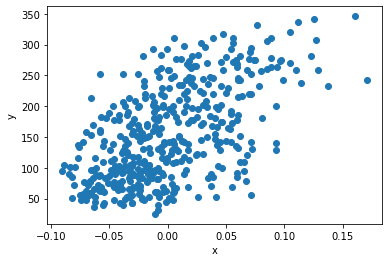

In [5]:
# 맷플롯립의 scatter( ) 함수로 산점도 그리기
# 샘플 하나 당 특성이 10개나 되기 때문에, 특성 한개 여기서는 세번째(인덱스=2) 특성에 대해서만 우선 살펴본다.
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 그래프를 보고 정비례 관계가 있구나~ 라고 생각해볼 수 있음 !

In [6]:
# 입력 데이터의 세 번째 특성을 분리해서 변수에 저장해 두기
x = diabetes.data[:, 2]
y = diabetes.target

# 03-2 경사 하강법에 대해 알아보자.

In [7]:
# 우선 w와 b를 무작위로 초기화해서 시작하는 경우
w = 1.0
b = 1.0

In [8]:
# 모델에 넣고 예측값 구하기
y_hat = x[0] * w + b
print(y_hat)

1.0616962065186886


In [9]:
# 실제 타깃값과 비교
print(y[0])

151.0


In [10]:
w_inc = w + 0.1
y_hat_inc = w_inc * x[0] + b
print(y_hat_inc)

1.0678658271705574


In [11]:
# w가 0.1만큼 증가했을 떄 y_hat은 얼마나 증가했는지
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.061696206518688734


In [12]:
w_new = w + w_rate
print(w_new)

1.0616962065186888


In [13]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

1.1616962065186887


In [14]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.0


In [15]:
b_new = b + 1
print(b_new)

2.0


In [16]:
# 오차와 변화율을 곱해서 가중치와 절편을 업데이트한다.
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [17]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616381767 75.52764127612664


In [18]:
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

587.8654539985689 99.40935564531424


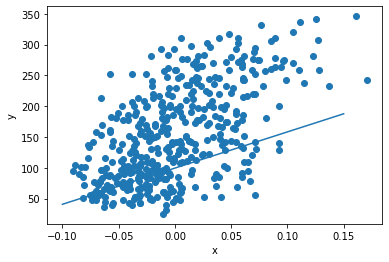

In [19]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [20]:
for i in range(1, 100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w, b)

# 에포크를 반복했더니 그려진 직선이 위의 그래프보다 점들을 더 잘 표현하고 있다.

913.5973364345905 123.39414383177204


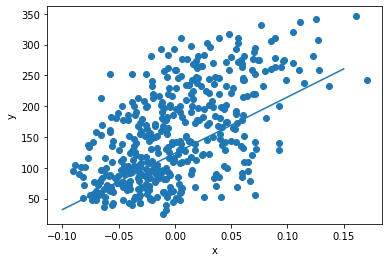

In [21]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])  # 직선 그을 시작점 , 끝점 두개
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 에포크를 반복했더니 그려진 직선이 위의 그래프보다 점들을 더 잘 표현하고 있다.

In [22]:
# 만약 입력 x에 새로운 데이터가 들어온 경우
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643899983


## 03-4 뉴런을 만들어보자

In [23]:
class Neuron:
    def __init__(self):
        self.w = 1.0  # 가중치 초기화
        self.b = 1.0  # 절편 초기화

    def forpass(self, x):
        y_hat = x * self.w + self.b  # 직선 방정식 계산
        return y_hat

    def backprop(self, x, err):
        w_grad = x * err  # 가중치에 대한 그래디언트 계산
        b_grad = 1 * err  # 절편에 대한 그래디언트 계산
        return w_grad, b_grad

    def fit(self, x, y, epochs = 100):
        for i in range(epochs):  # 에포크만큼 반복
            for x_i, y_i in zip(x, y):  # 모든 샘플에 대해 반복
                y_hat = self.forpass(x_i)  # 정방향 계산
                err = -(y_i-y_hat)  # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= w_grad  # 가중치 업데이트
                self.b -= b_grad  # 절편 업데이트


In [24]:
neuron = Neuron()
neuron.fit(x, y)

In [ ]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()